# Script to convert DiMESTV TIFF to videos 

In [1]:
import os
import read

# list of files ending in .tif in 'munaretto/2022-11-21_Bortolon'
files = os.listdir('munaretto/2022-11-21_Bortolon')
processed = os.listdir('/home/maana/mp_2022_34_53/dimes')
processed = [file.split('.')[0] for file in processed]
for file in files:
    if file.endswith('.tif'):
        
        shot = file.split('_')[0]
        if shot in processed:
            print(f'now reading {file} - skip video already processed')
        else:
            print(f'now reading {file}')
            read.dimes_movie(f'munaretto/2022-11-21_Bortolon/{file}')


now reading 192963_CII_1x1_1ms_low.tif
now reading 192964_CII_1x1_1ms_low.tif
now reading 192960_DaplhaND_1x1_5ms_low.tif
now reading 192970_CII_1x1_1ms_low.tif
now reading 192969_CII_1x1_1ms_low.tif
now reading 192974_CII_1x1_1ms_low.tif
now reading 192973_CII_1x1_1ms_low.tif
now reading fiducial.tif
now reading 192967_CII_1x1_1ms_low.tif
now reading 192965_CII_1x1_1ms_low.tif
now reading 192962_CII_1x1_1ms_low.tif
now reading 192961_CII_1x1_4ms_low.tif
now reading 192966_CII_1x1_1ms_low.tif
now reading 192972_CII_1x1_1ms_low.tif
now reading 192968_CII_1x1_1ms_low.tif


# Show diagnostics view on the image from A. McLean     

** DiMES HEAD Posittion in the image - [0.7425000000000002, -1.2860477246198914] [x m,y m]

** DiMES TV FOV defined by these four points in the image - ([1.2513126515529454, -1.452450897466661], [0.6168952474546125, -1.846820304666919], [0.2902879884328313, -1.3024508591372181], [0.9247053925311641, -0.9080814519369601]) [x m,y m]

** Fastcam FOV in the image - (-0.72, -50) [R m,phi deg]

TypeError: _linspace_dispatcher() missing 1 required positional argument: 'stop'

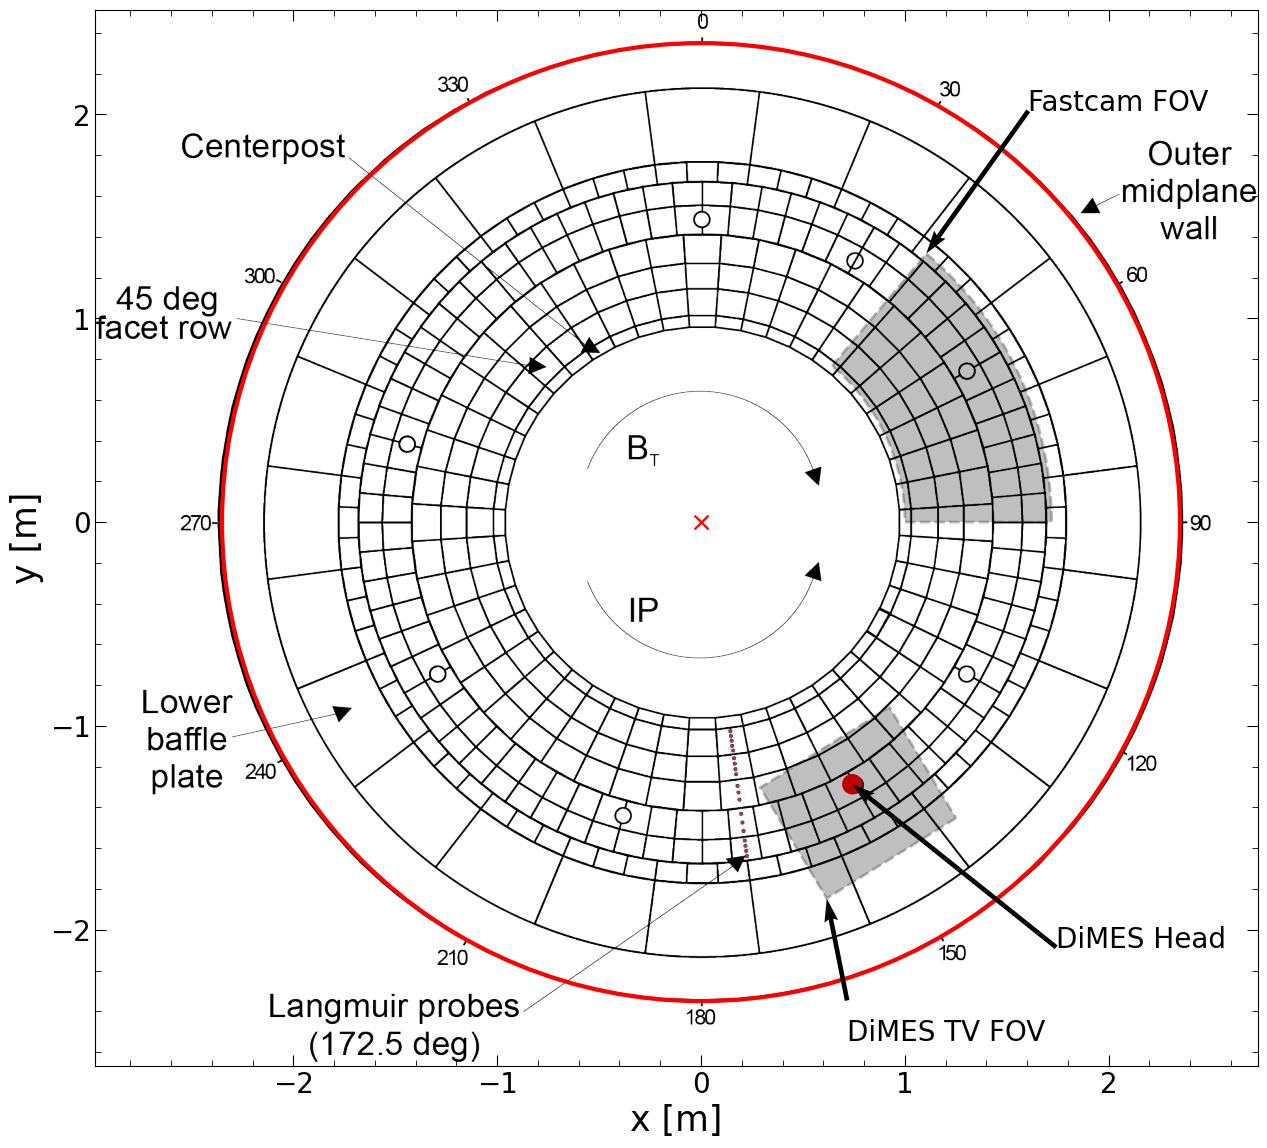

In [4]:
import floor 
import matplotlib.pyplot as plt
import numpy as np
import process 

fig, ax = plt.subplots(1,figsize=(15,15))
fig, ax = floor.show_diagnostics(fig, ax, ['dimes_tv','fastcam','dimes'])
# define radial slices that will be analyzed
fastcam = [45,65,80]
dimestv = [145,160]
slices = [fastcam, dimestv]
# define the width of the slices in the phi direction
slice_width = 1
# show the slices on the floor plot
R = np.linspace(0,2.35,100)
pol_coords = []
for slice in slices:
    for phi in slice:
        r_pos = [r for r in R]
        phi_pos = list(phi*np.ones(len(R)))
        X = []
        Y = []
        for r,phi in zip(r_pos,phi_pos):
            x,y = process.pol_to_cart([r,phi])
            X.append(x)
            Y.append(y)
        ax.plot(X,Y,'k--')

# Play one of the DiMES videos, and show the I,C coil plot next to it 

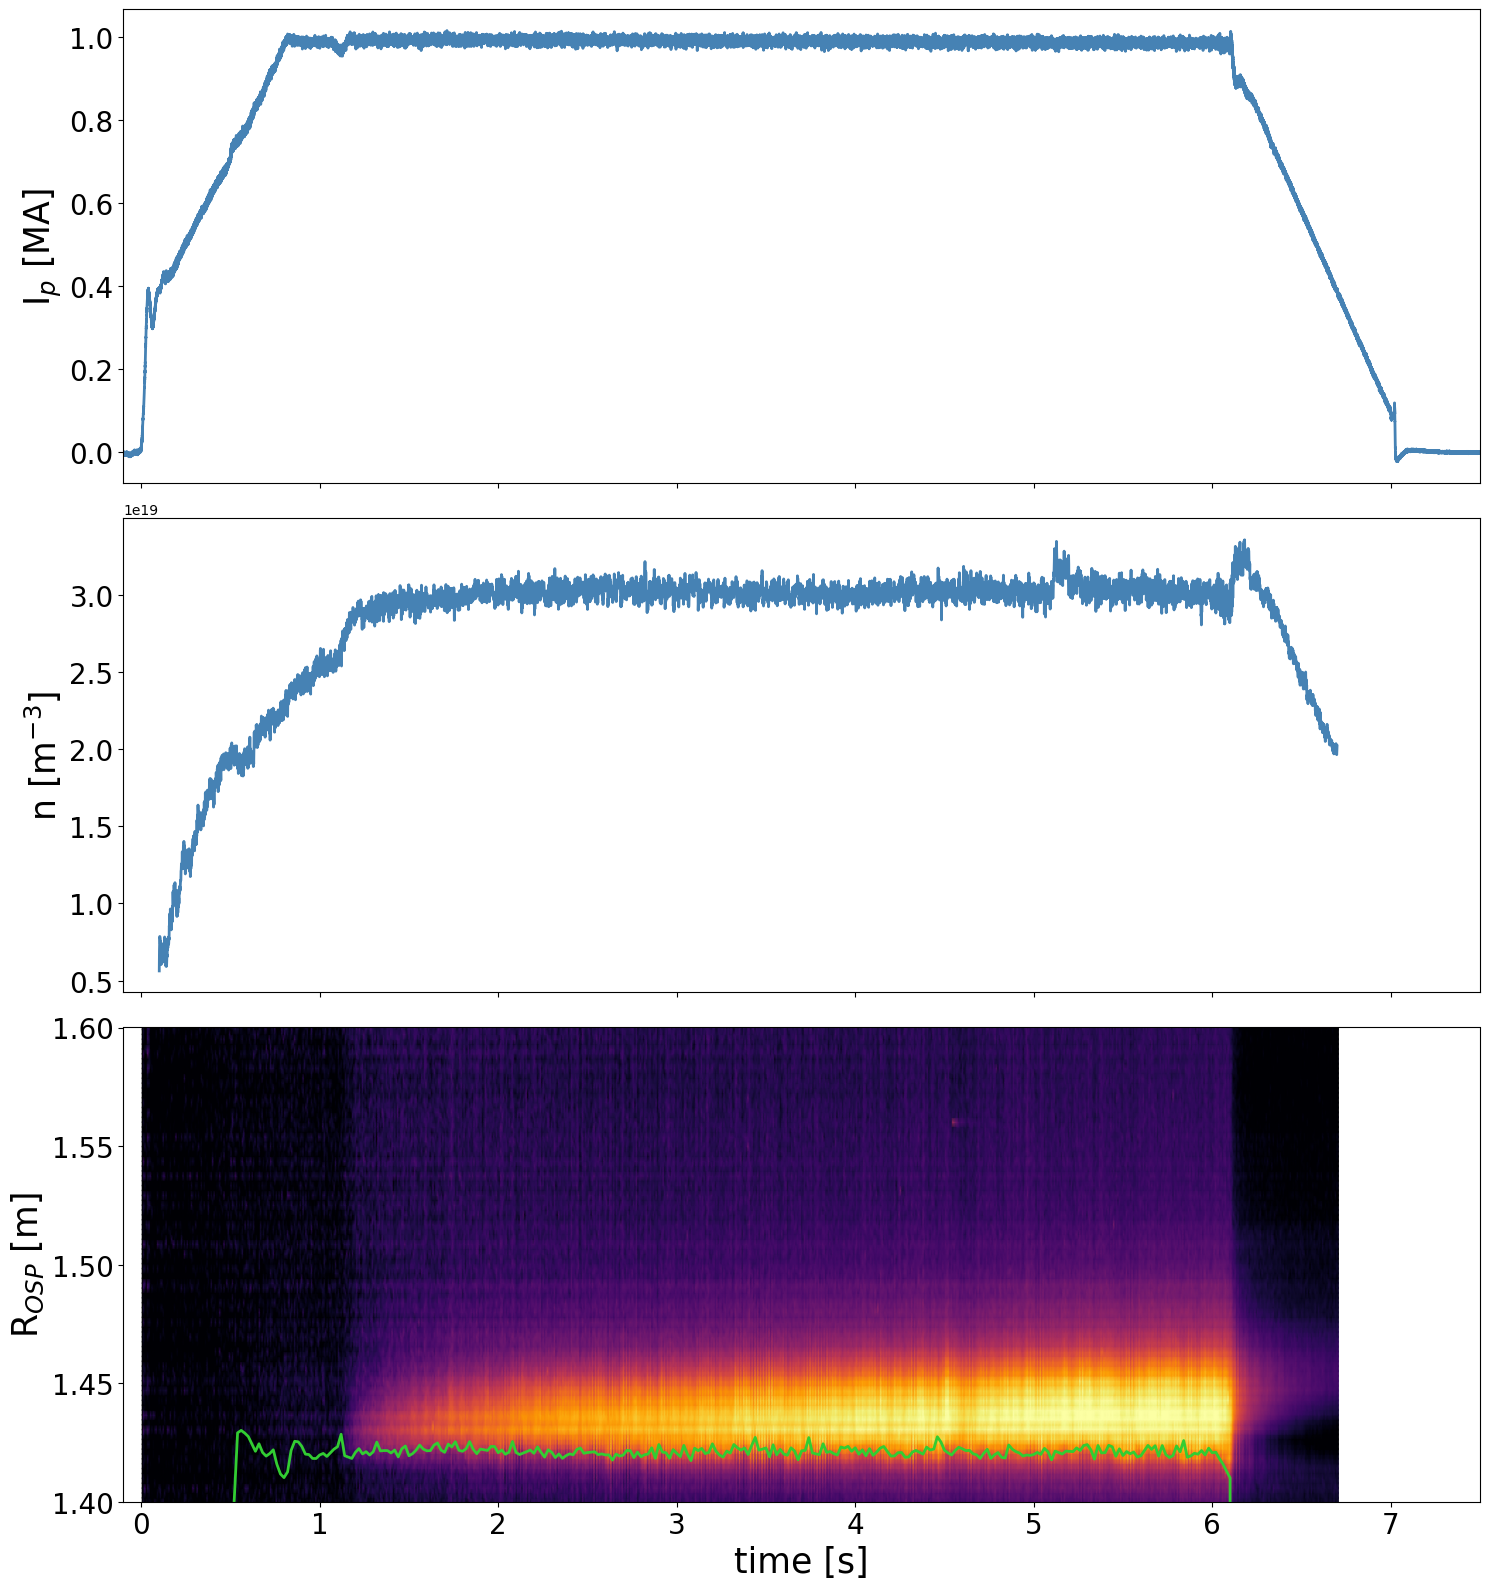

In [11]:
import matplotlib.pyplot as plt
import plot_tools as plot
import read
import numpy as np
import matplotlib.colors 

shot = 192966
fig, ax = plt.subplots(3,1,figsize=(15,16))
ip,t,units = read.one_d(shot,'ip')
plot.plot1d_ax(ax[0],t/1000,ip/1e6,'time [s]',r'I$_p$ [MA]',xlim=[-0.1,7.5])
n,t,units = read.one_d(shot,'density')
plot.plot1d_ax(ax[1],t/1000,n*1e6,'time [s]',r'n [m$^{-3}$]',xlim=[-0.1,7.5])

x,t,pos,units = read.two_d(192963,'irtvq2dr2')
ax[2].pcolormesh(t/1000,pos/100,np.transpose(x),cmap='inferno',shading='gouraud',
                 vmin=1,vmax=95)
ax[2].set_ylim([1.4,1.6])
ax[2].set_xlim([0,7.5])

osp,t,units = read.one_d(shot,'rvsod')
plot.plot1d_ax(ax[2],t/1000,osp,'time [s]',r'R$_{OSP}$ [m]',xlim=[-0.1,7.5],ylim=[1.4,1.6],c='limegreen')

# remove xlables and xticklabels from all but bottom plot
for i in range(len(ax)-1):
    ax[i].set_xlabel('')
    ax[i].set_xticklabels([])
    
    
# tight 
fig.tight_layout()

In [2]:
import read
import matplotlib.pyplot as plt
import numpy as np
x,pos,t,units = read.two_d(192963,'rrsp')
# plot the data
fig, ax = plt.subplots(1,figsize=(15,5))
ax.pcolormesh(pos,t,np.transpose(x),cmap='inferno')
# ylim 140 and above
ax.set_ylim([140,160])

ValueError: No data in rrsp on #192963 @ DIII-D

In [3]:
pos

array([5.6292000e+00, 1.3540200e+01, 2.1451200e+01, 2.9361200e+01,
       3.7274200e+01, 4.5184200e+01, 5.3097198e+01, 6.1007198e+01,
       6.8920197e+01, 7.6830200e+01, 8.4743202e+01, 9.2653198e+01,
       1.0056620e+02, 1.0847720e+02, 1.1638720e+02, 1.2430020e+02,
       1.3221120e+02, 1.4012120e+02, 1.4803419e+02, 1.5594321e+02,
       1.6385519e+02, 1.7176620e+02, 1.7967720e+02, 1.8758920e+02,
       1.9550020e+02, 2.0341319e+02, 2.1132320e+02, 2.1923621e+02,
       2.2714619e+02, 2.3505920e+02, 2.4297020e+02, 2.5088022e+02,
       2.5879321e+02, 2.6670319e+02, 2.7461621e+02, 2.8252719e+02,
       2.9043820e+02, 2.9834821e+02, 3.0626120e+02, 3.1417221e+02,
       3.2208221e+02, 3.2999521e+02, 3.3790521e+02, 3.4581821e+02,
       3.5372821e+02, 3.6164120e+02, 3.6955121e+02, 3.7746420e+02,
       3.8537320e+02, 3.9328519e+02, 4.0119620e+02, 4.0910721e+02,
       4.1701920e+02, 4.2493021e+02, 4.3284219e+02, 4.4075320e+02,
       4.4866422e+02, 4.5657620e+02, 4.6448721e+02, 4.7239819e